# MTH 575 Report 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import math as mt

## Riemann Problem and Shock Speed (focussing on Burger's equation): 

* In the last report, we observed that the solution to the burger's equation produces a shock as soon as the slope in any region of the initial condition is $<0$.

* A conservation law together with piecewise constant data having a single discontinuity is called the Riemann problem. An example is

$$ u(x,t) =  
\left\{
    \begin{array}{lr}
        u_l & ; &  x<st \\
        u_r & ; &  x>st \\
    \end{array}
    \right \}
$$

where $s=(u_l + u_r)/2$ is the shock speed.

* $u_l > u_r$ gives a unique solution with the infinitesimal viscosity limit of the viscous-burger's equation converging to this solution.

* $u_l < u_r$ does not give a unique solution, with the infinitesimal viscosity limit of the viscous-burger's equation not converging to this solution. Additionally, this solution is not stable to perturbations to initial data.

* A propagating shock solution is a weak solution to Burger's equation only if the speed of propagation is $(u_l+u_r)/2$. More generally, the speed of propagation for an arbirary flux function can be computed as follows.

$$
\frac{d}{dt} \int^{M}_{-M} u(x,t) dx = \frac{d}{dt} \left( (M+st)u_l + (M-st)u_l \right) = s(u_l-u_r)
$$

but we also have from the conservation law that,
$$
\frac{d}{dt} \int^{M}_{-M} u(x,t) dx = f(u_l) - f(u_r)
$$
Identifying the RHS from both sides we find that,
$$
s = \frac{f(u_l)-f(u_r)}{u_l-u_r}
$$

This is the **Rankine-Hugoniot jump condition**.


## Entropy Conditions:

* Since weak solutions in general are not unique, further conditions are required to constrain the weak solutions to unique ones. This is done via entropy conditions.

* One example for the linear hyperbolic PDEs is introducing a vanishing viscosity ($0<\epsilon<<1$), $$u_{t}^{\epsilon} + f_x(u^{\epsilon}) = ϵu_{xx}^{\epsilon}$$,
then the entropy solution is given by,
$$\lim_{ϵ →0} u^{\epsilon}(x,t) = u(x,t)$$

* But this turns out to be not very easy to work with in general, so there are the following simpler conditions.

    1.$$f'(u_l) > s > f'(u_r)$$ (necessary but not sufficient for uniqueness)
    
    2. $$ \frac{f(u) - f(u_l)}{u - u_l} \geq s \geq \frac{f(u) - f(u_r)}{u - u_r}$$
    3. $\exists\  E>0\  \forall\ a>0, t>0, x\in\mathbb{R}: \\ 
    \frac{u(x+a,t) - u(x,t)}{a} < \frac{E}{t}$

* There is another approach to define an entropy solution, which is by defining an entropy function $\eta(u)$ (additionally requireing it to be convex), which also obeys a different conservation law which holds for smooth solutions and becomes a discontinuity for discontinuous solutions. (I think the analogy is drawn from the concept of entropy in physics for a thermodynamic system, whose changes are $0$ for a cyclic quasistatic reversible process, but is $<0$ for an irreversible process.)

* $$\eta(u)_t + \psi(u)_x = 0$$ 
is the required ocnservation law, where $\psi$ is the flux function for the entropy. For smooth $u$, via chain rule, one can obtain,
$$\eta'(u)u_t + \psi'(u)u_x = 0$$
But we also know from the conservation law that,
$$\eta'(u) [u_t + f'(u)u_x] = 0$$
Comparing the two gives us,
$$\psi'(u) = \eta'(u) f'(u)$$

All these manipulations are **invalid** for discontinuous $u$, hence going to the vanishing viscosity limit of the original CL,
$$
\eta_t(u) + \psi_x(u) = ϵ\eta'(u)u_{xx} = ϵ(\eta'(u)u_{x})_x - ϵ\eta''(u)u_x^2
$$
But we chose $\psi'' > 0$, which implies the second term is always $>0$,
$$
\implies \eta_t(u) + \psi_x(u) \leq ϵ(\eta'(u)u_{x})_x
$$

* Simply intergrating on $(x,t) \sim (\mathbb{R} \times \mathbb{R}^+)$, (note: the integral sign and limit operation commute due the dominated convergence theorem, hence the limit ${ϵ→0}$ can be taken within the integral)
$$
\int_{\mathbb{R}} \int_{\mathbb{R}^+} [\eta_t(u) + \psi_x(u)] dxdt \leq \int_{\mathbb{R}} \int_{\mathbb{R}^+} ϵ(\eta'(u)u_{x})_x dxdt = \int_{\mathbb{R}^+} ϵ(\eta'(u)u_{x}(-\infty) - \eta'(u)u_{x}(-\infty)) dt
$$
On the RHS, the disconinuity in $u$ causes the $u_x$ to have a delta function behavior at the $x$ values corresponding to the disconinuities, which inside the spacial domain and not the boundaries, which implies that this term is some finite quantity. Which implies that in the $ϵ→0$ limit, this term vanishes, and we are left with,
$$
\int_{\mathbb{R}} \int_{\mathbb{R}^+} [\eta_t(u) + \psi_x(u)] dxdt \leq 0
$$



* Since derivatives are not defined in case of discontinuiies, the preceeding can also be shown in the weak sense by first multiplying with a test function $\phi$ (with compact support $\phi \in C^2_0(\mathbb{R}, \mathbb{R}^+)$), such that $\phi\geq 0$. Now integrating and with similar arguments one can show that,
$$
\int_{\mathbb{R}} \int_{\mathbb{R}^+} [\eta(u)\phi_t + \psi(u)\phi_x] dxdt \geq 0
$$



## Lax Friedrich's Scheme:

This is an an explicit first order scheme using forward in time and centered in space scheme. The additional point of note is that the scheme is stabilized by averaging $u_j^n$ by surrounding spacial points.

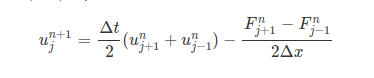

In [4]:
#LAX FRIEDRICH'S SCHEME
def lax_fried(U, T, X):
    for n in range(len(T)-1):
        for j in range(0,len(X)):
            #using periodic boundary conditions
            jp1 = (j+1)%len(X) 
            jm1 = (j-1)%len(X)

            up1 = U[n][jp1]
            um1 = U[n][jm1]

            U[n+1][j] = (up1+um1)/2 - (f(up1)-f(um1))/(2*sig)
    return U

In [10]:
del_t = 0.01
del_x = 0.1
sig = (del_x/del_t)

x_i = -20
x_f = 20
t_i = 0
t_f = 100

eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)

U = np.zeros(shape=(len(T), len(X)))

# # DOWN-STEP FUNCTION WAVE
# for i in range(len(U[0])):
#     if X[i]>0:
#         U[0,i] = 0
#     else:
#         U[0,i] = 1

# GAUSSIAN PULSE
U[0] = np.exp(-X**2/5)

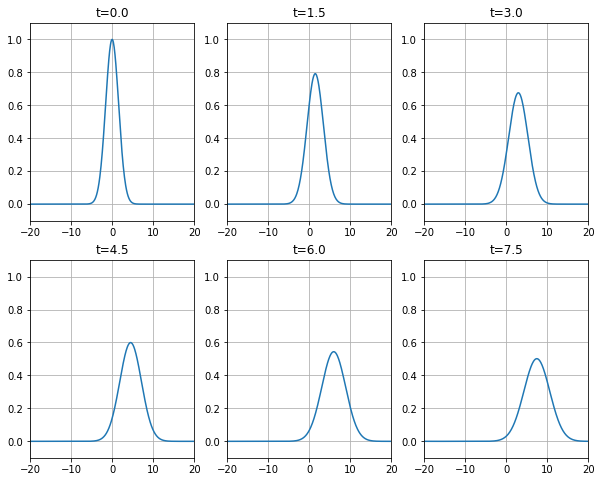

In [11]:
# FLUX FUNCTION
def f(u):
    return u

def f1(u):
    return 1

U = lax_fried(U,T,X)

fig = plt.figure(figsize=[10,8])
axs = fig.subplots(nrows=2, ncols=3)
times = np.arange(0,900,150)
idx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    # ax.set_yscale('log')
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(np.min(U[0])-.1,np.max(U[0])+.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

**Observations:** We did not have to take care of the direction of flow like in the up/down wind schemes, but this method is in general diffusive. (The diffusion constant depends on the choice of grid parameters.)

## Lax Wendroff Scheme:

This is a second order method that is based on the idea:
* repeatedly replace the higher derivatives in time with appropriate spacial derivatives according the the CL equation. Typically for $u_t + f'(u)u_x = 0$, replace as (this only holds assuming these operators act on $u$ which obeys the CL)
$$
\frac{d}{dt} = -f'(u)\frac{d}{dx}
$$

* use central difference to approximate all spacial derivatives.

* for the (inviscid-)Burger's equation, we get the following,



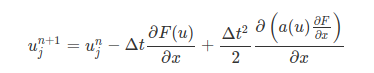

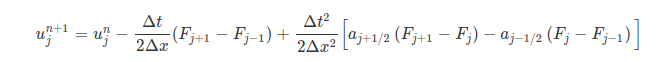

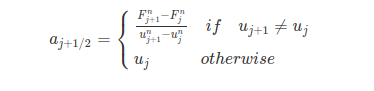

In [12]:
#LAX WENDROFF'S SCHEME
def lax_wend(U,T,X):
    for n in range(len(T)-1):
        for j in range(0,len(X)):
            jp1 = (j+1)%len(X)
            jm1 = (j-1)%len(X)
            u = U[n][j]

            up1 = U[n][jp1]
            um1 = U[n][jm1]
            
            uph = (up1+u)/2 - (f(up1)-f(u))/(2*sig)
            umh = (u+um1)/2 - (f(u)-f(um1))/(2*sig)

            U[n+1][j] = u - (f(uph)-f(umh))/sig
    return U

In [15]:
def f(u):
    return u #0.5*u**2

def f1(u):
    return 1 #u

del_t = 0.01
del_x = 0.1
sig = (del_x/del_t)

x_i = -20
x_f = 20
t_i = 0
t_f = 100

eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)

U = np.zeros(shape=(len(T), len(X)))

# # DOWN-STEP FUNCTION WAVE
# for i in range(len(U[0])):
#     if X[i]>0:
#         U[0,i] = 0
#     else:
#         U[0,i] = 1

# GAUSSIAN PULSE
U[0] = -2*X*np.exp(-X**2)

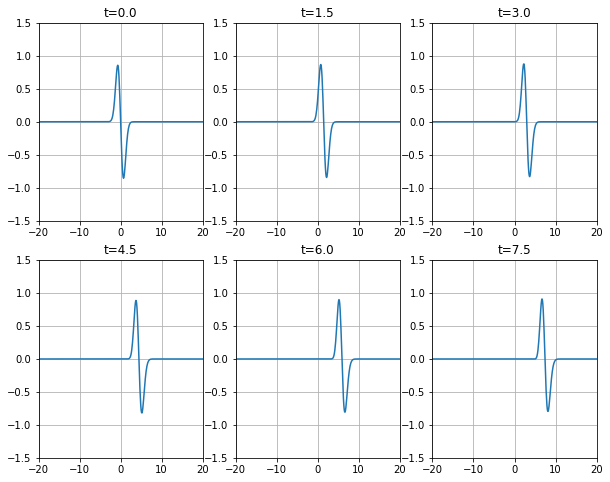

In [17]:
U = lax_wend(U,T,X)
fig = plt.figure(figsize=[10,8])
axs = fig.subplots(nrows=2, ncols=3)
times = np.arange(0,900,150)
idx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,U[times[i]])
    # ax.set_yscale('log')
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(-1.5,1.5)
    # ax.set_ylim(np.min(U[0])-.1,np.max(U[0])+.1)
    
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

**Observations:** We did not have to take care of the direction of flow like in the up/down wind schemes, but this method is in general dispersive. (The dispersion constant depends on the choice of grid parameters.)

## Model Equations:

We can see that the advection equation we coded using the lax-friedrich's and lax-wendroff's methods had additional artifacts (diffusion and dispersion respectively). These are just numerical artifacts since we know the exact analytical solution doesn't have them.

What usually happens in practice is that our difference scheme that we use to approximate the differential equation approximates a different differential equation more exactly. This is called the modified equation.

**Lax Friedrichs:**

The modified equation for this method is $u_t + au_x = ϵu_{xx}$, where $ϵ=\frac{\Delta x^2}{2\Delta t} (1 - a^2\frac{\Delta t^2}{\Delta x^2})$. This is like a diffusion constant, which as I had alluded to, depends on the grid parameters chosen.

In Fourier space, the dispersion relation for this equation is $\omega(k) \sim ak - iϵ k^2$, which causes a selective decay of some fourier modes. This leads to diffusion in Real space ($\sim$ (x,t) space).


**Lax Wendroff:**

The modified equation for this method is $u_t + au_x + ϵu_{xxx}=0$, where $ϵ=\frac{\Delta x^2}{6}a(1 - a^2\frac{\Delta t^2}{\Delta x^2})$. This is like the **KdV equation** whose Kdv constant again depends on the grid parameters chosen.

In Fourier space, the dispersion relation for this equation is $\omega(k) \sim ak - ϵ k^3$, which causes a differnt phase speed ($\sim \omega(k)/k$) of fourier modes. This leads to dispersion in Real space ($\sim$ (x,t) space).



## Solving Burger's equation via Lax-Wendroff and Lax-Friedrichs methods:

In [ ]:
# FLUX FUNCTION
def f(u):
    return u**2/2

def f1(u):
    return u

del_t = 0.01
del_x = 0.1
sig = (del_x/del_t)

x_i = -20
x_f = 20
t_i = 0
t_f = 100

eps = 1e-6

T = np.arange(t_i, t_f+eps, del_t)
X = np.arange(x_i, x_f+eps, del_x)

U = np.zeros(shape=(len(T), len(X)))
# SINE FUNCTION WAVE
wid = 2
for i in range(len(U[0])):
    if X[i]>0 and X[i]<2*wid*np.pi:
        U[0,i] = mt.sin(1.0/wid*X[i])
    else:
        U[0,i] = 0
Ulf = lax_fried(U,T,X)


U = np.zeros(shape=(len(T), len(X)))
# SINE FUNCTION WAVE
wid = 2
for i in range(len(U[0])):
    if X[i]>0 and X[i]<2*wid*np.pi:
        U[0,i] = mt.sin(1.0/wid*X[i])
    else:
        U[0,i] = 0
Ulw = lax_wend(U,T,X)

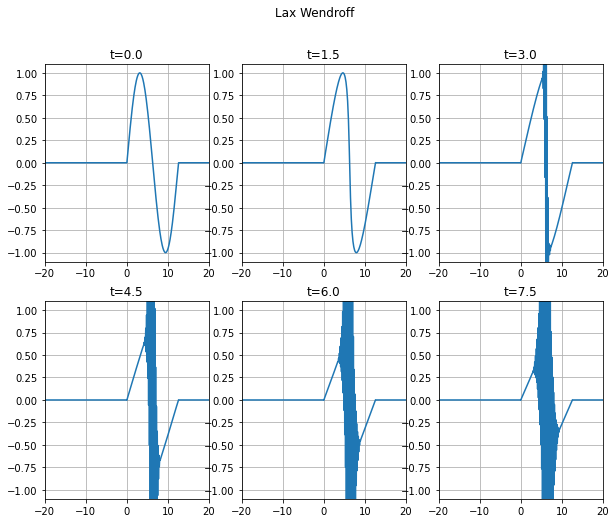

In [ ]:
fig = plt.figure(figsize=[10,8])
fig.suptitle("Lax Wendroff")
axs = fig.subplots(nrows=2, ncols=3)
times = np.arange(0,900,150)
idx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,Ulw[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(np.min(Ulw[0])-.1,np.max(Ulw[0])+.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

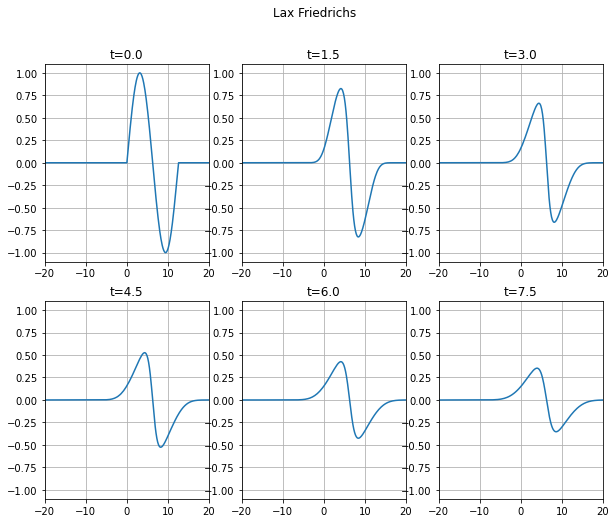

In [ ]:
fig = plt.figure(figsize=[10,8])
fig.suptitle("Lax Friedrichs")
axs = fig.subplots(nrows=2, ncols=3)
times = np.arange(0,900,150)
idx = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
for i in range(len(times)):
    ax = axs[idx[i]]
    ax.plot(X,Ulf[times[i]])
    ax.set_title(f"t={T[times[i]]}")
    ax.set_ylim(np.min(Ulf[0])-.1,np.max(Ulf[0])+.1)
    ax.set_xlim(-20,20)
    ax.grid()
plt.show()
plt.close('all')

**Observations:**
1. LF: The diffusive term causes the modified equation to behave like the normal burger's equation in with a viscous term. This viscous term prevents the solution from becoming non-classical at the discontinuity. We also observe diffusion as the amplitude decreases as time increases.

2. LW: The solution till $t=3.0s$ looks classical, but then the numerical solution breaks down. Numerical dispersion does not appear to prevent the shock formation at the discontinuity.

## Semi Discrete Methods:

There is a class of methods to solve space-time PDEs by separately discretizing the spacial and temporal derivaives. These are called semi-discrete methods, where one discretizes the spacial derivatives first, to convert the PDE into a time-dependent ODE, and then uses time marching to solve the ODE.

First discretizing the spacial domain gives us a time dependent spacial vector $\vec u(t)$ where the components are $u_j \sim u(x_j)$, where $x_j$ is the $j^{th}$ grid point in the spacial grid.

A PDE typically reduces to an ODE of the form,
$$
\frac{d\vec u(t)}{dt} = A \vec u
(t) - \vec f(t)
$$
where $A \neq A(t)$ and the matrix depends on the choice of difference operator used to approximate the spacial derivatives.

For example, for the advection equation with periodic boundary conditions using centered spacial difference, the corresponding equation is,
$$
\frac{d\vec u}{dt} = \frac{a}{2 \Delta x} \mathcal{B}_P(-1,0,1)\vec u
$$
where $\mathcal{B}_P(-1,0,1)$ is a periodic banded matrix.

Now this ODE can be diagonalized (decoupled) with the eigenbasis of $A$ as:
$$
\frac{d w_j(t)}{dt} = \lambda_j w_j
(t) - \tilde f_j(t)
$$
where $\vec w = X^{-1}\vec u$, $X^{-1}AX = diag(\{\lambda_i\}|_i)$, $\tilde f = X^{-1}f$, and $X \equiv [\{\vec x_i\}|_i]$ is the matrix of eigenvectors of $A$.

With this, the exact solution for this ODE can be written down,
$$
\vec u(t) = \sum_{m} c_m exp(\lambda_m t)\vec x_m + A^{-1}\vec f(t)
$$

## Future Study:
1. I would like to study whether instead of computing this exact solution, could one apply time marching via Runge-Kutta or Predictor Corrector Schemes.

2. I want to study concepts of stability for non-linear methods to properly apply a numerical method to solve non-linear PDEs with the correct grid parameters and schemes.

3. Eventually I would like to numerically solve a non-linear hyperbolic system relevant to Numerical Relativity like in https://arxiv.org/pdf/1906.03116.pdf.